In [6]:
import h5py
import os

# file = h5py.File('datasetsRosen/0a7e8940-9008-45fa-9a99-054757404083.h5')

Welche Konfigurationen und Instrumente gibt es?

In [32]:
directory = 'datasetsRosen'
configurations = []
instruments = []

for filename in os.listdir(directory):
    file = h5py.File(directory + '/' + filename)
    if 'data' in file:
        configName = file['data'].attrs['configuration']
        instrumentName = file['data'].attrs['instrument']
        if all(configName not in x for x in configurations):
            configurations.append(configName)
        if all(instrumentName not in x for x in instruments):
            instruments.append(instrumentName)
    if 'Daten' in file:
        configName = file['Daten'].attrs['configuration']
        instrumentName = file['Daten'].attrs['instrument']
        if all(configName not in x for x in configurations):
            configurations.append(configName)
        if all(instrumentName not in x for x in instruments):
            instruments.append(instrumentName)

print('Configurations: ', configurations)
print('Instruments: ', instruments)

Configurations:  ['America', 'Africa', 'Australia', 'Europe', 'Asia']
Instruments:  ['Dog', 'Elephant', 'Pufferfish', 'Unicorn', 'Dolphin']


Geschwindigkeit mit Zeit- und Wertfilter

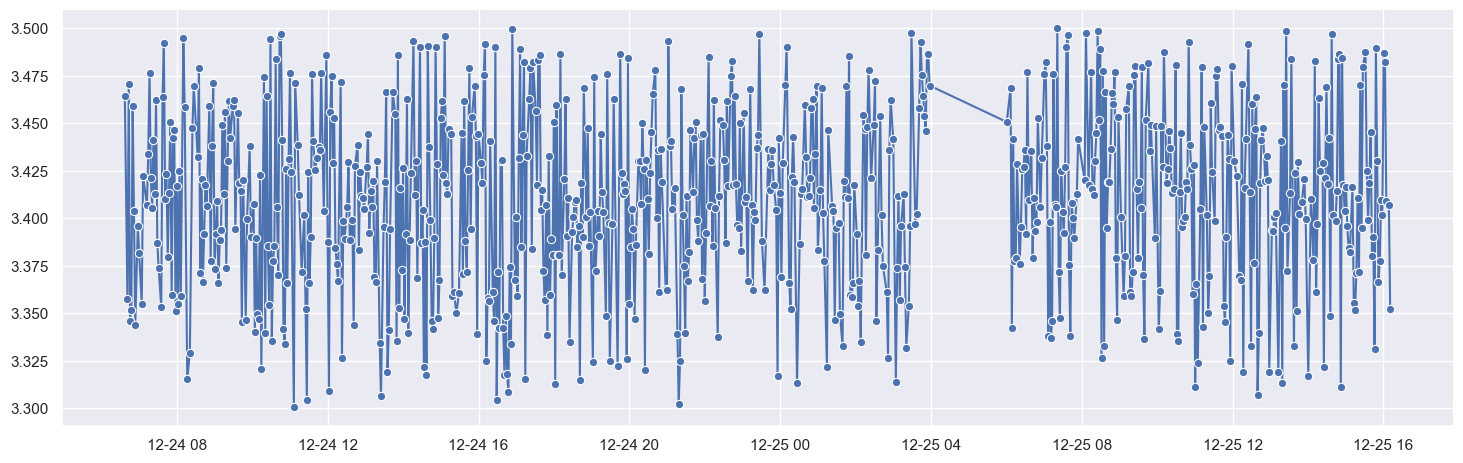

In [70]:
import seaborn as sns
from datetime import datetime
import pytz

utc_timezone = pytz.utc

dataset = file['data']['velocity']
timestamp = file['data']['timestamp']

# Daten filtern und in Tupel-Array umwandeln
filtered_array = [
    (value, datetime.fromtimestamp(ts, tz=utc_timezone))
    for value, ts in zip(dataset, timestamp)
    if value < 3.5 and value > 3.3 and datetime.fromtimestamp(ts, tz=utc_timezone).year >= 1980
]
# Sortiere das Tupel-Array nach Zeitstempel
filtered_array.sort(key=lambda x: x[1])

# Umkehre die Reihenfolge der Tupel für die Verwendung in sns.relplot
values, timestamps = zip(*filtered_array)

# Apply the default theme
sns.set_theme()

sns.relplot(x=timestamps, y=values, kind='line', marker='o', aspect=3)

# sns.relplot(
#     x=range(len(filtered_array)), y=filtered_array, kind='line', marker='o'
# )

Defect Channel mit Zeitfilter

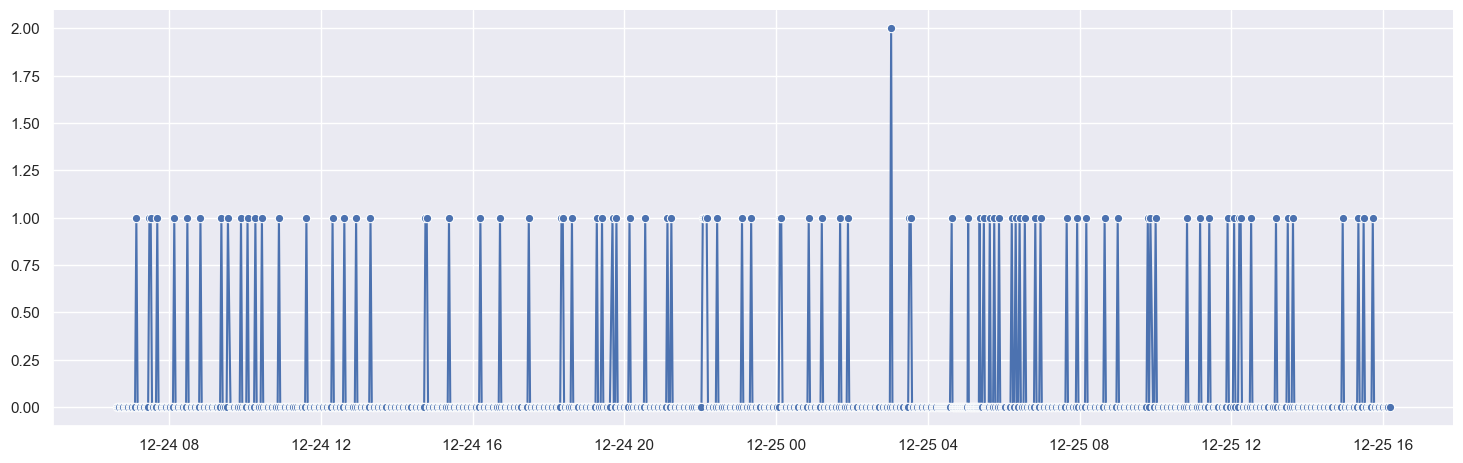

In [69]:
import seaborn as sns
from datetime import datetime
import pytz

utc_timezone = pytz.utc

dataset = file['data']['defect_channel']
timestamp = file['data']['timestamp']

# Daten filtern und in Tupel-Array umwandeln
filtered_array = [
    (value, datetime.fromtimestamp(ts, tz=utc_timezone))
    for value, ts in zip(dataset, timestamp)
    if datetime.fromtimestamp(ts, tz=utc_timezone).year >= 1980
]
# Sortiere das Tupel-Array nach Zeitstempel
filtered_array.sort(key=lambda x: x[1])

# Umkehre die Reihenfolge der Tupel für die Verwendung in sns.relplot
values, timestamps = zip(*filtered_array)

# Apply the default theme
sns.set_theme()

sns.relplot(x=timestamps, y=values, kind='line', marker='o', aspect=3)

# sns.relplot(
#     x=range(len(filtered_array)), y=filtered_array, kind='line', marker='o'
# )

Zusammenhang Magnetisierung und Wandstärke

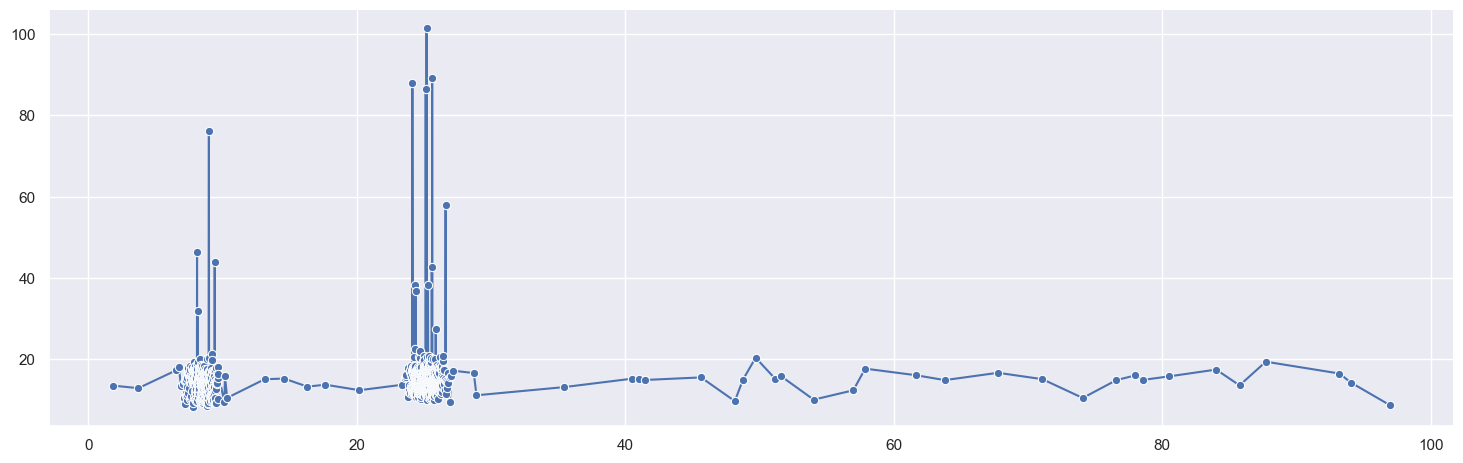

In [79]:
import seaborn as sns
from datetime import datetime
import pytz

utc_timezone = pytz.utc

dataset_1 = file['data']['magnetization']
dataset_2 = file['data']['wall_thickness']

# Daten filtern und in Tupel-Array umwandeln
filtered_array = [
    (value1, value2)
    for value1, value2 in zip([float(value.decode('utf-8')) for value in dataset_1[:] if value != b'Easteregg :)'], dataset_2)
    #if datetime.fromtimestamp(ts, tz=utc_timezone).year >= 1980
]
# Sortiere das Tupel-Array nach Zeitstempel
# filtered_array.sort(key=lambda x: x[1])

# Umkehre die Reihenfolge der Tupel für die Verwendung in sns.relplot
values_1, values_2 = zip(*filtered_array)

# Apply the default theme
sns.set_theme()

sns.relplot(x=values_2, y=values_1, kind='line', marker='o', aspect=3)

# sns.relplot(
#     x=range(len(filtered_array)), y=filtered_array, kind='line', marker='o'
# )

In [2]:
import pandas as pd

df = pd.read_hdf("datasetsRosen/0a7e8940-9008-45fa-9a99-054757404083.h5")
print(df)

ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.